**::: importing necessary libraries :::**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
df.shape

(891, 12)

**::: Data Cleaning :::**

In [95]:
#Handling missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
#dtype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**::: Data Imputation and Conversion :::**

In [97]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [98]:
#data type consversion
# df['Age'] = pd.to_numeric(df['Age'])

In [99]:
#Imputing missing values in Cabin:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [100]:
#Converting Cabin to categorical
df['Cabin'] = df['Cabin'].astype('category')
df['Age'] = df['Age'].astype('int32')
df['Embarked'] = df['Embarked'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [101]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age               int32
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [102]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [103]:
#checking if any duplicate rows present
df.duplicated().sum()

0

**::: Univariate Analysis :::**

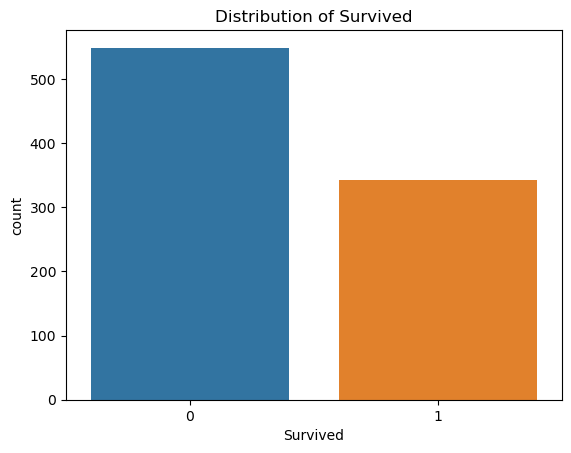

In [104]:
sns.countplot(x="Survived",data=df)
plt.title("Distribution of Survived")
plt.show()

In the above figure (1) , We see that more passengers did not survive (61%) than those who did (39%).

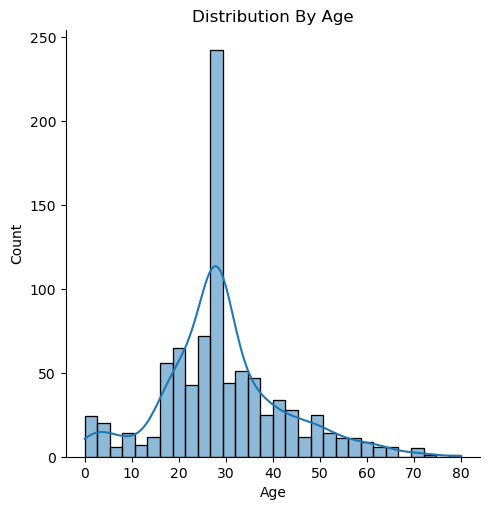

In [105]:
sns.displot(x="Age",data=df,kde=True)
plt.title("Distribution By Age")
plt.show()

In the above figure (2) , We see that mostly passengers were from 28 to 30 age .

**::: Bivariate Analysis :::**

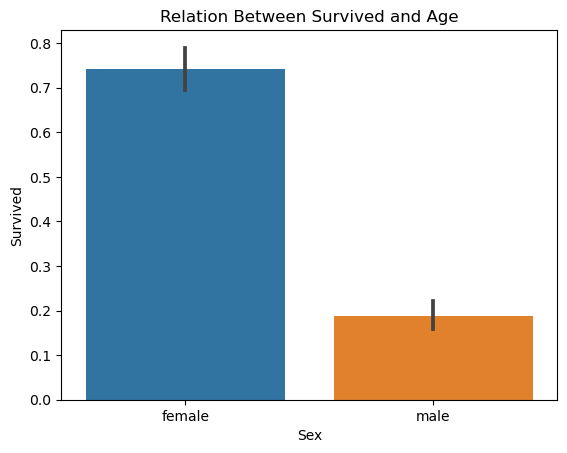

In [106]:
sns.barplot(x="Sex",y="Survived",data=df)
plt.title("Relation Between Survived and Age")
plt.show()

In the above figure (3) , We see that female passengers survived more than male passengers .

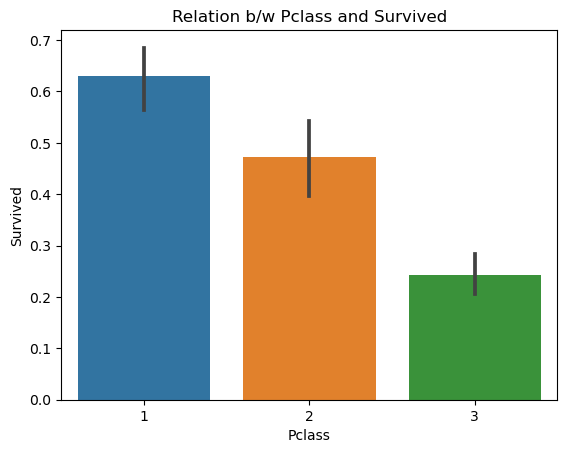

In [107]:
sns.barplot(x="Pclass",y="Survived",data=df)
plt.title("Relation b/w Pclass and Survived")
plt.show()

In the above figure (4) , We see that passengers in higher classes (Pclass 1 and 2) were more likely to survive than those in lower classes (Pclass 3).

**Multivariate Analysis**

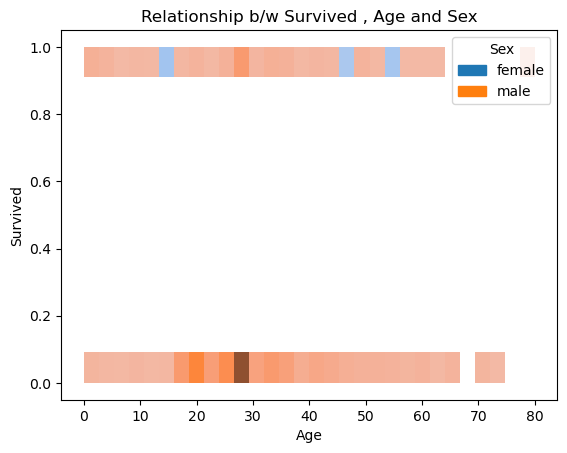

In [108]:
sns.histplot(x="Age",y="Survived",hue="Sex",data=df)
plt.title("Relationship b/w Survived , Age and Sex")
plt.show()

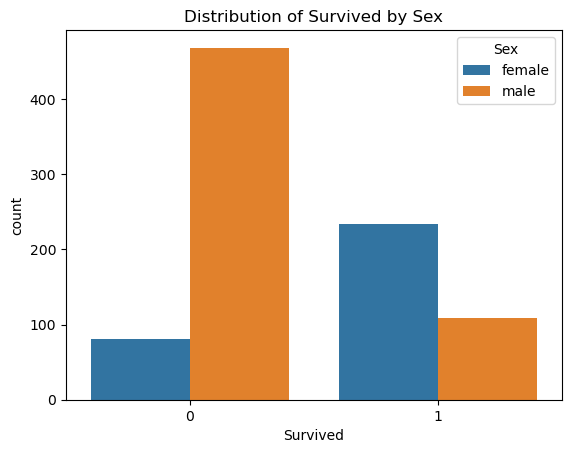

In [109]:
sns.countplot(x="Survived",hue="Sex",data=df)
plt.title("Distribution of Survived by Sex")
plt.show()

In [117]:
survivingValues = df['Survived'].value_counts()

In [126]:
survivingValues

0    549
1    342
Name: Survived, dtype: int64

In [120]:
uniqueSurviving = df['Survived'].unique()

In [128]:
uniqueSurviving = ['No','Yes']

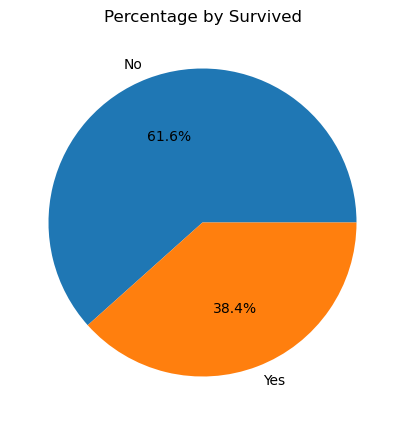

In [129]:
plt.figure(figsize=(8,5))
plt.pie(survivingValues,labels=uniqueSurviving, autopct='%1.1f%%')
plt.title("Percentage by Survived")
plt.show()

**::END::**